# Autompg dabl exploration for plot improvements

This Notebook outlines some notes posted to dabl: https://github.com/amueller/dabl/issues/179

In [10]:
import datetime
import pandas as pd
import dabl
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-01-30T12:37:15+00:00

CPython 3.7.6
IPython 7.11.1

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-24-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


# Load autompg dataset

In [3]:
df = pd.read_csv('autompg.csv')
df.head()

,mpg,cylinders,displacement,hp,weight,acceleration,year,territory,carname
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970,USA,ford torino


Target looks like regression


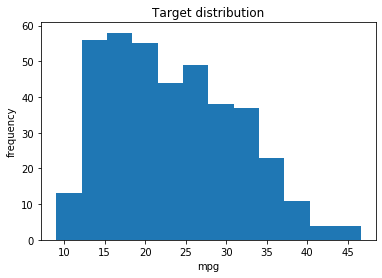

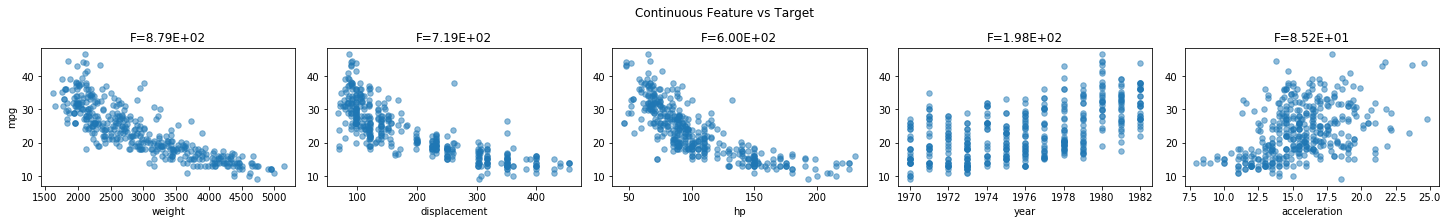

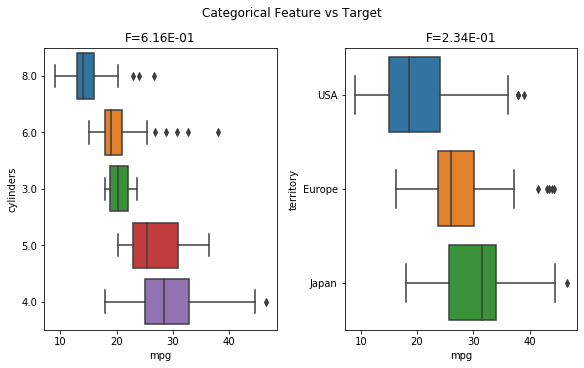

In [4]:
dabl.plot(df.dropna(), target_col='mpg')

## Possible changes to boxplot for categoricals

### This is a standard Seaborn boxplot, pretty similar to dabl's

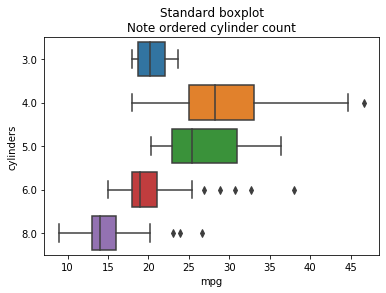

In [5]:
ax = sns.boxplot(data=df, x='mpg', y='cylinders', orient='h')
ax.set_title('Standard boxplot\nNote ordered cylinder count');

### Adding notches to the boxplot plus a countplot highlight low-count cases

Notch reference - https://stackoverflow.com/a/38795446/18688

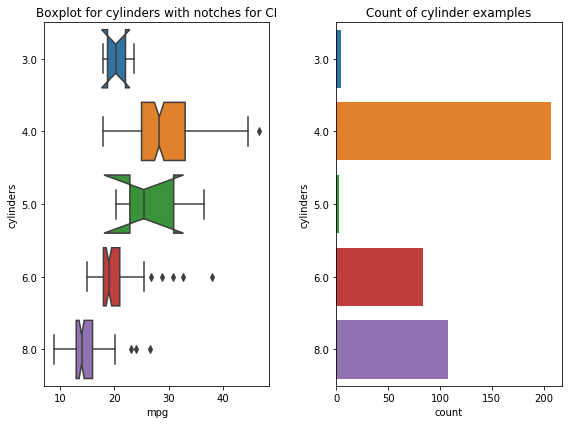

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 6))
ax = axs[0]
sns.boxplot(data=df, x='mpg', y='cylinders', notch=True, ax=ax, orient='h')
ax.set_title('Boxplot for cylinders with notches for CI')
ax = axs[1]
sns.countplot(data=df, y='cylinders', ax=ax, orient='h')
ax.set_title('Count of cylinder examples')
fig.tight_layout()

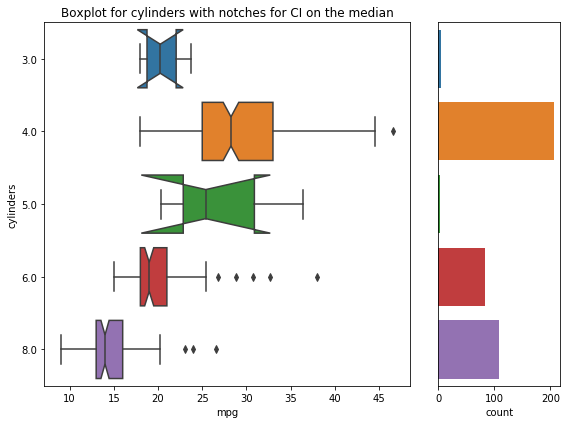

In [7]:
gridspec = {'width_ratios': [3, 1]}
fig, axs = plt.subplots(ncols=2, figsize=(8, 6), gridspec_kw=gridspec)
ax = axs[0]
sns.boxplot(data=df, x='mpg', y='cylinders', notch=True, ax=ax, orient='h')
ax.set_title('Boxplot for cylinders with notches for CI on the median')
ax = axs[1]
sns.countplot(data=df, y='cylinders', ax=ax, orient='h')
#ax.set_title('Count of cylinder examples')
ax.get_yaxis().set_visible(False)
fig.tight_layout()

### Add counts to y-labels

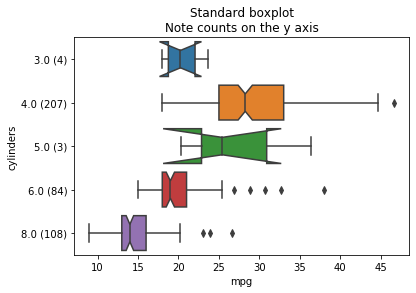

In [8]:
ax = sns.boxplot(data=df, x='mpg', y='cylinders', orient='h', notch=True)
ax.set_title('Standard boxplot\nNote counts on the y axis');

# count cylinders, set index back to string to match matplotlib label
vc = df.cylinders.value_counts()
vc.index = vc.index.astype(str)

new_labels = []
for label in ax.get_yticklabels():
    text = label.get_text()
    count = vc[text]
    new_labels.append(f'{text} ({count})')
ax.set_yticklabels(new_labels);

In [9]:
print(f"Notebook completed on {datetime.datetime.now()}")

Notebook completed on 2020-01-30 11:59:10.689435
